In [12]:
import numpy as np

from phimal_utilities.data import Dataset
from phimal_utilities.data.burgers import BurgersDelta
from phimal_utilities.analysis import load_tensorboard

from copy import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context='paper', style='white')

%config InlineBackend.figure_format = 'svg'

In [13]:
noise = 0.2
run = 0
df_single_pdefind = load_tensorboard(f'pdefind/runs/pdefind_{noise:.2f}_run_{run}/')

In [14]:
coeff_keys = [key for key in df_single_pdefind.keys() if key[:5]=='coeff']
scaled_coeff_keys = [key for key in df_single_pdefind.keys() if key[:6]=='scaled']
ini_keys = [key for key in df_single_pdefind.keys() if key[:3]=='ini']

In [15]:
df_single_pdefind.keys()

Index(['Total_loss', 'MSE_0', 'Regression_0', 'L1_0', 'coeff_0_0', 'coeff_0_1',
       'coeff_0_2', 'coeff_0_3', 'coeff_0_4', 'coeff_0_5', 'coeff_0_6',
       'coeff_0_7', 'coeff_0_8', 'coeff_0_9', 'coeff_0_10', 'coeff_0_11',
       'scaled_coeff_0_0', 'scaled_coeff_0_1', 'scaled_coeff_0_2',
       'scaled_coeff_0_3', 'scaled_coeff_0_4', 'scaled_coeff_0_5',
       'scaled_coeff_0_6', 'scaled_coeff_0_7', 'scaled_coeff_0_8',
       'scaled_coeff_0_9', 'scaled_coeff_0_10', 'scaled_coeff_0_11'],
      dtype='object')

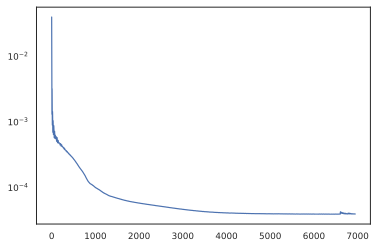

In [16]:
plt.semilogy(df_single_pdefind.index, df_single_pdefind.MSE_0)

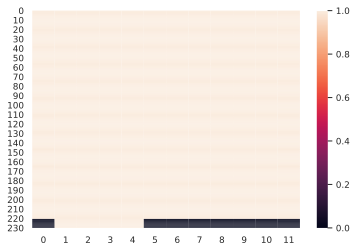

In [17]:
active_terms = df_single_pdefind[scaled_coeff_keys].to_numpy()[::30]
active_terms[np.abs(active_terms) > 0] = 1
sns.heatmap(active_terms)

# Combined

In [18]:
df_pdefind = pd.read_pickle('data/pdefind_collected.pd')

In [19]:
df_pdefind = df_pdefind.sort_values(by=['noise', 'run'])
df_pdefind = df_pdefind.reset_index(drop=True)

In [20]:
df_pdefind

,noise,run,Total_loss,MSE_0,Regression_0,L1_0,coeff_0_0,coeff_0_1,coeff_0_2,coeff_0_3,...,scaled_coeff_0_2,scaled_coeff_0_3,scaled_coeff_0_4,scaled_coeff_0_5,scaled_coeff_0_6,scaled_coeff_0_7,scaled_coeff_0_8,scaled_coeff_0_9,scaled_coeff_0_10,scaled_coeff_0_11
0,0.0,0,-19.067417,0.000011,1.626671e-06,1.767506,0.00000,-0.996947,-1.003077,0.974364,...,-0.322627,0.548895,0.559861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1,-19.316378,0.000010,1.593973e-07,1.612782,0.00034,-1.001619,-1.012241,0.983095,...,-0.234684,0.541088,0.517985,-0.005484,-0.003023,-0.002619,0.012601,0.014575,-0.030616,0.021214
2,0.2,0,-16.538115,0.000040,2.208132e-06,1.701084,0.00000,-0.981205,-1.027045,0.949647,...,-0.313717,0.522870,0.537991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.2,1,-16.254383,0.000042,9.801880e-06,1.510549,0.00000,-0.964256,-0.895088,0.883223,...,-0.223079,0.594585,0.455561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.4,0,-14.147859,0.000132,5.308625e-06,1.622406,0.00000,-0.969646,-1.025052,0.928856,...,-0.316271,0.477835,0.510632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.4,1,-14.237165,0.000127,4.096334e-06,1.474371,0.00000,-0.982502,-0.975542,0.937613,...,-0.218724,0.539550,0.497647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.6,0,-12.639034,0.000277,1.796845e-05,1.727119,0.00000,-0.896383,-1.091935,0.863541,...,-0.378587,0.473226,0.549861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.6,1,-12.707844,0.000271,1.229087e-05,1.480194,0.00000,-0.893234,-0.780078,0.870452,...,-0.205778,0.494265,0.569667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.8,0,-11.581685,0.000482,7.932115e-06,1.617849,0.00000,-0.975639,-0.972774,0.961674,...,-0.276164,0.505999,0.531610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.8,1,-11.560071,0.000483,1.701095e-05,1.527025,0.00000,-1.019007,-0.921250,0.748221,...,-0.233416,0.489420,0.539902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
coeff_keys = [key for key in df_pdefind.keys() if key[:5]=='coeff']
scaled_coeff_keys = [key for key in df_pdefind.keys() if key[:6]=='scaled']
ini_keys = [key for key in df_pdefind.keys() if key[:3]=='ini']

In [25]:
true_coeffs = np.zeros((1, 12))
true_coeffs[0, 1] = -1
true_coeffs[0, 2] = -1
true_coeffs[0, 3] = 1
true_coeffs[0, 4] = 1



In [27]:
zero_coeffs = copy(coeff_keys)
zero_coeffs.pop(4)
zero_coeffs.pop(3)
zero_coeffs.pop(2)
zero_coeffs.pop(1)

'coeff_0_1'

In [28]:
non_zero_terms = np.count_nonzero(df_pdefind[zero_coeffs], axis=1)
non_zero_terms[non_zero_terms!=0] = 1
non_zero_terms = ~non_zero_terms.astype(bool)
df_pdefind['correct'] = non_zero_terms

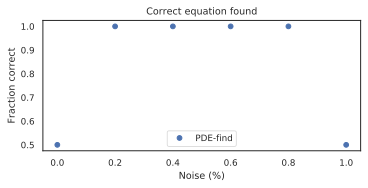

In [37]:
%config InlineBackend.figure_format = 'svg'

sns.set_context('paper')
sns.set_style('white')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 2.5), constrained_layout=True)

ax = axes
ax.plot(df_pdefind.pivot(index='noise', columns='run', values='correct').mean(axis=1), 'o', label='PDE-find')

ax.legend()
ax.set_ylabel('Fraction correct')
ax.set_xlabel('Noise (%)')
ax.set_title('Correct equation found')

fig.show()
plt.savefig('figure_6.pdf', )

In [40]:
df_pdefind.query('correct == False')[scaled_coeff_keys]

,scaled_coeff_0_0,scaled_coeff_0_1,scaled_coeff_0_2,scaled_coeff_0_3,scaled_coeff_0_4,scaled_coeff_0_5,scaled_coeff_0_6,scaled_coeff_0_7,scaled_coeff_0_8,scaled_coeff_0_9,scaled_coeff_0_10,scaled_coeff_0_11
1,0.002451,-0.226443,-0.234684,0.541088,0.517985,-0.005484,-0.003023,-0.002619,0.012601,0.014575,-0.030616,0.021214
11,0.000000,-0.286190,-0.218385,0.351678,0.503757,0.000000,0.000000,-0.234309,0.000000,0.000000,0.000000,0.000000
